## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""


In [1]:
import os
import keras

# 請嘗試設定 GPU：os.environ


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = (x -127. ) / 128.
    if flatten:
        x_ = x.reshape((len(x),-1))
    return x_
    
def preproc_y(y, n_class = 10):
    if y.shape[-1] == 1:
        y_ = keras.utils.to_categorical(y, n_class)
    return y_

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_class = 10, num_nurones=[512,512,256,256,128,128,64,64,32,32]):
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_nurones):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    output_layer = keras.layers.Dense(units=output_class, activation="softmax", name="output")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[output_layer])
    return model
model = build_mlp(x_train.shape[1:])
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 512)               262656    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer4 (Dense)        (None, 256)               65792     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer6 (Dense)        (None, 128)              

In [6]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [7]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [8]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/100
196/196 [==============================] - 5s 23ms/step - loss: 1.8377 - accuracy: 0.3384 - val_loss: 1.6075 - val_accuracy: 0.4346
Epoch 2/100
196/196 [==============================] - 4s 23ms/step - loss: 1.5573 - accuracy: 0.4502 - val_loss: 1.4985 - val_accuracy: 0.4687
Epoch 3/100
196/196 [==============================] - 5s 23ms/step - loss: 1.4200 - accuracy: 0.4989 - val_loss: 1.4270 - val_accuracy: 0.5011
Epoch 4/100
196/196 [==============================] - 5s 23ms/step - loss: 1.3184 - accuracy: 0.5379 - val_loss: 1.4088 - val_accuracy: 0.5012
Epoch 5/100
196/196 [==============================] - 6s 28ms/step - loss: 1.2310 - accuracy: 0.5691 - val_loss: 1.3668 - val_accuracy: 0.5277
Epoch 6/100
196/196 [==============================] - 5s 28ms/step - loss: 1.1321 - accuracy: 0.6019 - val_loss: 1.3771 - val_accuracy: 0.5291
Epoch 7/100
196/196 [==============================] - 5s 27ms/step - loss: 1.0560 - accuracy: 0.6293 - val_loss: 1.3669 - val_accuracy:

196/196 [==============================] - 6s 29ms/step - loss: 0.0837 - accuracy: 0.9727 - val_loss: 3.1169 - val_accuracy: 0.5376
Epoch 58/100
196/196 [==============================] - 5s 28ms/step - loss: 0.0725 - accuracy: 0.9766 - val_loss: 2.8638 - val_accuracy: 0.5325
Epoch 59/100
196/196 [==============================] - 5s 28ms/step - loss: 0.0811 - accuracy: 0.9752 - val_loss: 3.1812 - val_accuracy: 0.5390
Epoch 60/100
196/196 [==============================] - 6s 29ms/step - loss: 0.0896 - accuracy: 0.9713 - val_loss: 2.8774 - val_accuracy: 0.5358
Epoch 61/100
196/196 [==============================] - 5s 28ms/step - loss: 0.0775 - accuracy: 0.9754 - val_loss: 3.3486 - val_accuracy: 0.5368
Epoch 62/100
196/196 [==============================] - 5s 28ms/step - loss: 0.0723 - accuracy: 0.9760 - val_loss: 3.1115 - val_accuracy: 0.5385
Epoch 63/100
196/196 [==============================] - 6s 28ms/step - loss: 0.0798 - accuracy: 0.9739 - val_loss: 3.4292 - val_accuracy: 0.538

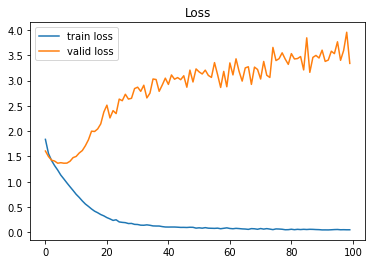

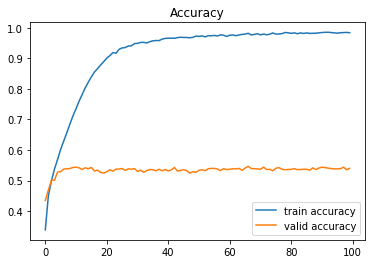

In [10]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()